<a href="https://colab.research.google.com/github/saumyadash9/Saumya-Dash-Bank-Marketing-Effectiveness-Prediction/blob/main/Saumya_Dash_Bank_Marketing_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Bank Marketing Effectiveness Prediction


##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**Saumya Dash
##### **Team Member 2 -**Kumar Abhinav


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [255]:
import warnings
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings    
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':50})

### Dataset Loading

In [256]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
# # Load Dataset
path = "/content/drive/MyDrive/Copy of bank-full.csv"
df = pd.read_csv(path, sep =";")

### Dataset First View

In [258]:
# Dataset First Look
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [259]:
# Dataset Rows & Columns count
df.shape

(45211, 17)

### Dataset Information

In [260]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [261]:
#creating a list for all continuous variables
continuous_list = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']

In [262]:
#creating a list for all categorical variables
categorical_list = [ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

#### Duplicate Values

In [263]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


* We can see that there are no duplicate instances in our dataset

In [264]:
# # check the number of unique values and the percent each value represents
# # for each categorical variable
# for v in categorical_list:
#     print(f'Unique values for {v}: {df[v].nunique()}\n', 
#           round(df[v].value_counts(normalize=True)* 100, 2), '\n')
#     print("*****************************")

In [265]:
# replacing the unknown values with Nan 
df = df.replace('unknown', np.nan) 

#### Missing Values/Null Values

In [266]:
# Missing Values/Null Values Count
#Checking Null Values
null_df= pd.DataFrame({"Total Values": df.shape[0] , "Total Null values": df.isnull().sum(),"%a of Null values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
null_df.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
poutcome,45211,36959,81.75
contact,45211,13020,28.80
education,45211,1857,4.11
job,45211,288,0.64
month,45211,0,0.00
previous,45211,0,0.00
pdays,45211,0,0.00
campaign,45211,0,0.00
duration,45211,0,0.00
age,45211,0,0.00


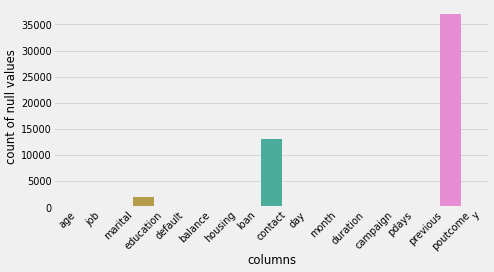

In [267]:
#vizualizing the columns with their total number of null values
null_df = df.isnull().sum().reset_index()
null_df.rename(columns = {'index':'columns', 0:'count of null values'}, inplace = True)
plt.figure(figsize=(10, 5))
sns.barplot(x = 'columns',
             y = 'count of null values',
            data = null_df)
sns.color_palette("mako", as_cmap=True)
plt.xticks(rotation= 45)
plt.show()

Text(0.5, 1.0, 'Missing Values in Dataset')

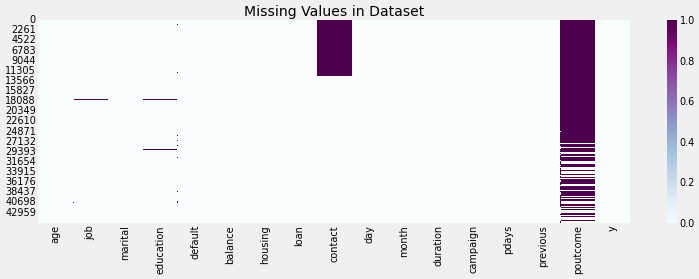

In [268]:
#vizualizing the null values of each column
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True,cmap = 'BuPu')
plt.title('Missing Values in Dataset')

# **What did you know about your dataset?**
* There are 45211 rows and 17 columns in the dataset. 
* There are 7 continuous and 10 categorical variables in our dataset.
* There are no duplicated instances in our dataset.
* We noticed that there were 4 columns job, education, contact and poutcome having unknown values. To count them we replaced the unknown values with Nan and then used isnull method.
* poutcome had the maximum no. of null values.

## ***2. Understanding Your Variables***

In [269]:
# Dataset Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [270]:
# Dataset Describe
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


### Variables Description 


1. *___ job ___*


*   This feature depicts the type of jobs.
*   There are 12 unique categories i.e 'management','technician', 'entrepreneur','blue-collar','unknown','retired','admin.','services','self-employed','unemployed','housemaid'and 'student'.
*   In this column we have 0.64% unknown values .



2.   *___ marital ___*

*   This column represents the marital status of the potential customers.
*   It has 3 unique categories i.e 'married', 'single' and 'divorced'.
*   We discovered that majorty of customers are married nearly 60% .


3.  *___ education ___*


*  This column represents the educational qualification of the potential customers.  
* It has 3 unique categories i.e  'tertiary','secondary' and 'primary'.
* We noticed that this column has 4.11% unknown values and majority of population with Secondry education (61%).

4.  *___ Default ___*

* This column represents whether the customer has credit in default or not.
* It has two unique categories i.e either yes or no .
* we observed that 98% population does not have credit in default.

5.  *___ housing ___*

* This columns depicts whether customer has a housing loan or not.
* It has two unique categories i.e either yes or no .
* We observed evenly distributed data in this column .

6.  *___ loan ___*
*This columns depicts whether customer has opted for any kind of loan or not.
* It has two unique categories i.e either yes or no .
* Majority of customers fall into the 'no' category.

7.  *___ contact ___*
* This column depicts the mode of communication with the potential customers.
* It has two unique values 'Cellular' and 'Telephone'.
* It was noticed that 28.80% had unknown values. The majority (64.77%) of the potential customers were contacted via cellular mode.

8. *___months ___*
* It depicts the months when the potential customers were last contacted.
* Most of customers were contacted in the month of 'May' followed by 'July' and 'August'

9. *___poutcome ___*
* It depicts the result of the last campaign.
* It consists 4 unique values i.e. 'sucess','failure'and 'others'.
* Here 81.75% of the values were unknown.

10. Target Variable: *___y ___*
* This column suggests whether the customer went for term deposit or not.
* It has two categories, 'Yes' and 'No'.

11. *___age ___*
* It represents the age of the potential customers.
* We can see mean of the age is around 40 and median is also close to mean.

12. *___balance ___*
* It depicts the account balance.
* Here we can see a huge gap in mean and median.

13. *___day ___*
* It depicts the day of the month (i.e. 1 to 31) on which the customer was last contacted.

14. *___duration ___*
* It depicts the time duration for which the customer was last contacted. 
**Note** As per the given instruction it should be only included for benchmark purposes and ignored if the objective is a realistic predictive model.

15. *___campaign ___*
* It represents how many times each prospective consumer was contacted as part of the current campaign.

16. *___pdays ___*
* It represents the number of days passed by after the client was contacted from a previous campaign. 
* Most of the clients were not contacted at all which is represented by -1 in the dataset.

17. *___previous ___*
* It is the number of contacts performed before this campaign.



### Check Unique Values for each variable.

In [271]:
# Check Unique Values for each variable.
print("Unique values in these categorical features: \n")
for i in categorical_list:
  print(f'Unique values in {i} ----------> {df[i].unique()}')

Unique values in these categorical features: 

Unique values in job ----------> ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Unique values in marital ----------> ['married' 'single' 'divorced']
Unique values in education ----------> ['tertiary' 'secondary' nan 'primary']
Unique values in default ----------> ['no' 'yes']
Unique values in housing ----------> ['yes' 'no']
Unique values in loan ----------> ['no' 'yes']
Unique values in contact ----------> [nan 'cellular' 'telephone']
Unique values in month ----------> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome ----------> [nan 'failure' 'other' 'success']
Unique values in y ----------> ['no' 'yes']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [272]:
# Write your code to make your dataset analysis ready.

In [273]:
#replacing the missing values in job,education and contacts column with mode 
null_list = ['job','education','contact']
for i in null_list:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [274]:
#replacing the null values in poutcome with others
df['poutcome'].fillna('other', inplace = True)

In [275]:
#checking the count of null values in each variables of the dataset
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [276]:
#checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [277]:
#mapping the non contacted values i.e. -1 as 0 and all other values as 1 in a new column p_contacted
df['p_contacted'] = [0 if x == -1 else 1 for x in df.pdays]

In [278]:
#dropping the old column pdays 
df.drop(columns=['pdays'], inplace=True)

### What all manipulations have you done and insights you found?

* **Job**: There were 288 nan values in this column. So we substituted the same with the mode of the column i.e. "Blue Collar jobs" as it was a categorical variable.
* **Education**: There were 1857 nan values in this column, we substituted it  with the mode i.e. "Secondary Education".
* **Contact**: Since there are 13,020 nan values in this column and we are aware that cellular communication is currently the most preferred one, we made the assumption that the nan values might be replaced with cellular type values. And also the mode of the column is 'Cellular'.
* **poutcome**: It contained 3 fields that is 'success', 'failure' and 'others'. Here we assumed that the unknown data points will fall under 'other' category, thus were filled with 'other'.
* **pdays**: We have mapped the non contacted values i.e -1 as 0 and all the other values as 1 and renamed it p_contacted, where 1 represents that the client was contacted.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Chart - 1 - Univariate Analysis - Continuous Variable**

 *** Continuous(Numerical) Variables**

---



In [279]:
# Chart - 1 visualization code
#univariate analysis -- Continuous variables
#defining a function to plot the count of the continuous variables of the dataset
def plot_cont(x):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(x.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(x.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.distplot(a= df[t],   
                     ax=ax, color= 'steelblue')
        plt.title(t + '_distribution')

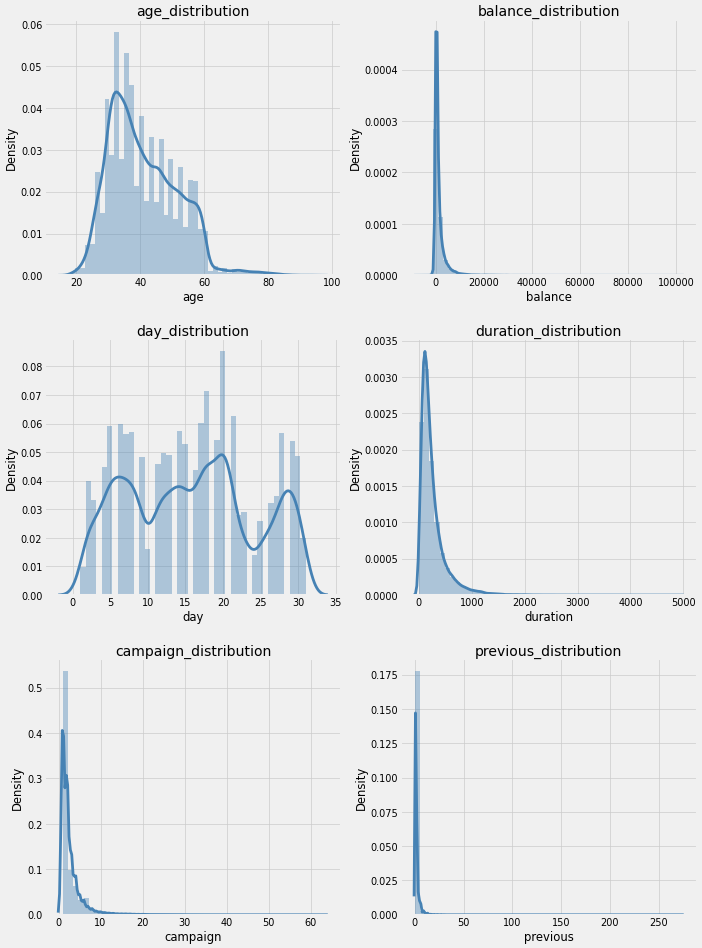

In [280]:
#using the defined function to plot the probability density graphs of the continuous variables
plot_cont(df[continuous_list])

**1. Why did you pick the specific chart?**

**DISTRIBUTION PLOT**  
We are plotting the probability density function for the different continuous variables to check the spread of data.It provides the details of where the centeral tendencies lie and what is the variance of particular feature.

##### **2. What is/are the insight(s) found from the chart?**

These are the insights found from diffrent variables:




*   The population belongs to the age group below 60 that is working population is our target customers.
*   Majority of people earns less than $5000.

*   There is a huge bump at zero in both *previous* and *campaign* columns that means most of the customers were not contacted at all.

 **3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.**

Ofcourse above insights can be helpful in targeting our customers as per their age and salary . They may be a potential customer who may do term deposit in near future.
Since we saw that most of the customers were not contacted it means we are losing out on these potential customers because we are leaving them unattended.

### **Chart - 2 Univariate Analysis - Continuous Variables**

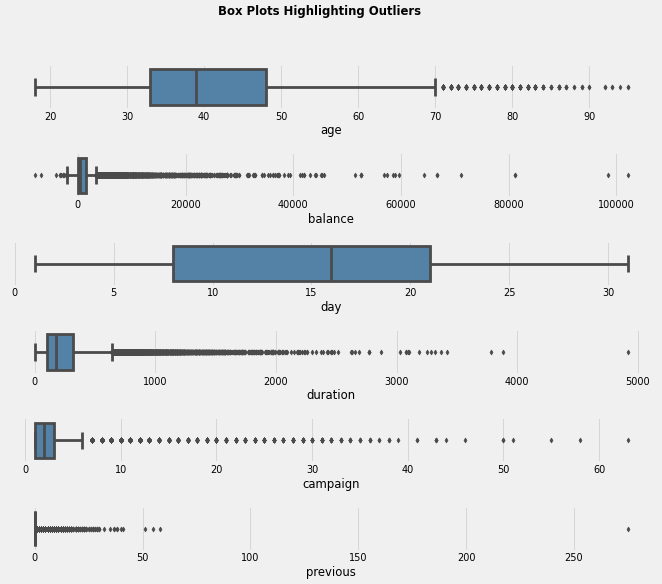

In [281]:
#using box plot to find the median and quartiles and know the distribution of the continous distribution 
nrows = len(continuous_list)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(continuous_list):
    sns.boxplot(df[var], orient='h', ax=axes[i],color= 'steelblue')

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

##### **1. Why did you pick the specific chart?**
**BOX PLOT**

We picked box plot to check for the outliers in each continuous features.


##### **2. What is/are the insight(s) found from the chart?**

* The median age of the customers is near 40 years and there are only a few older population.

* We can see that a significant number of customers received more than 20 contacts, whereas the majority of customers received no contacts at all.
* Same is the case with duration of the call in the last contact where some customers were given ample amout of time while majority calls were of the shorter duration.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, the above information might be useful in determining where the business is making mistakes when it comes to consumer engagement. The company may benefit if the right clients are targeted with a right strategy.

### **Chart - 3 Univariate Analysis - Categorical Variable**

In [282]:
#creating a temporary list with the binary type categorical features of the dataset
relevant_list = ['y','default','housing','loan','contact']

In [283]:
#univariate analysis -->> Continuous
#defining a function to plot pie charts using for loop and functions
def plot_cont(x):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(x.columns) //2 +1 
    ncols = 2
    sliceColors = ['#c2c2f0','#ffb3e6']  
    for i,t in enumerate(list(x.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        plt.pie(df[t].value_counts(), shadow = True, labels = ['Yes','No'], autopct='%1.1f%%',colors=sliceColors )
        plt.title(t + '_ValueCounts')
        

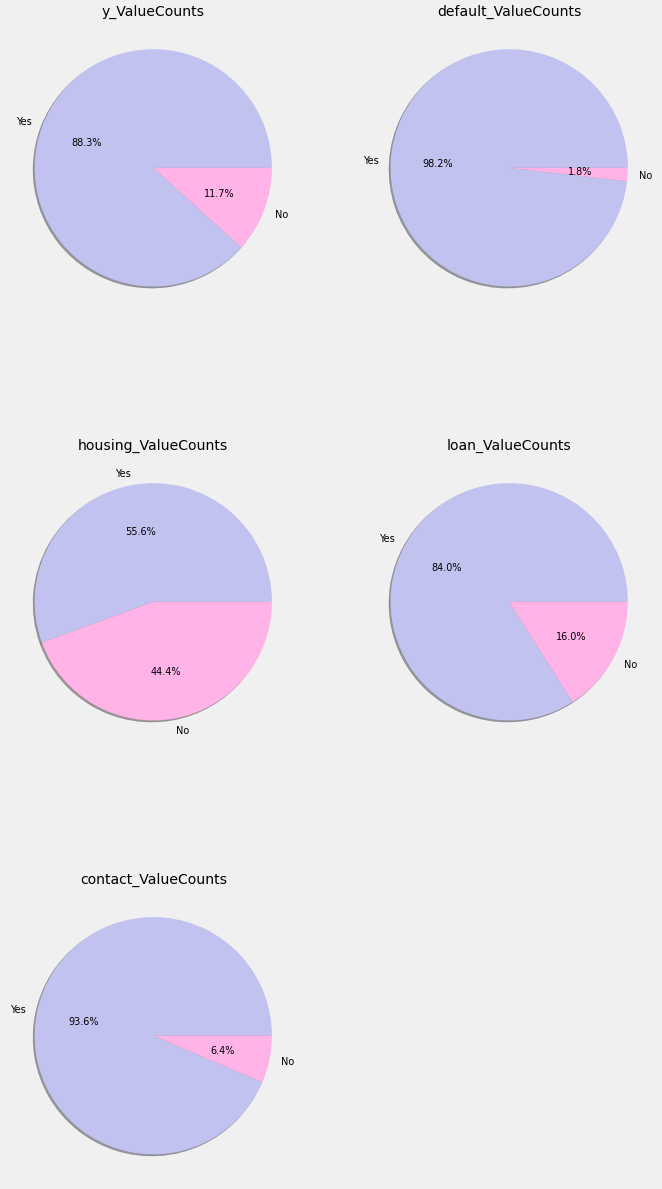

In [284]:
#plotting pie charts using the above defined functionfor all the binary type categorical variables
plot_cont(df[relevant_list])

##### **1. Why did you pick the specific chart?**

**PIE CHART**

Since all the above features are of binary categories i.e it has two fields either yes or no we can know the percentage of occurance of these which may tell us some story.

##### **2. What is/are the insight(s) found from the chart?**

* Our target variable i.e y has majority of yes, this the clear case of class imbalance.
* 98% of the population has credit in default.
* 56% has already opted for housing loan.
* 84% has opted for some kind of loan.
* 94% has not been contacted.

##### **3.Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes Class imbalance can have ill impact on the accuracy of the classification model So it will be necessory for us to treat this problem before putting the data in training. Other imformation which are available to us through the pie chart can be helpful in categorizing the customers into groups and then make plans accordingly.

### **Chart - 4 Univariate Analysis - Categorical Variables** 

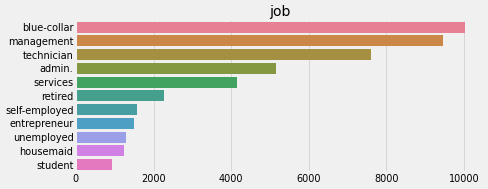

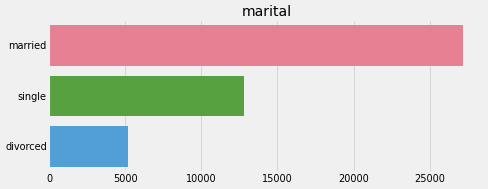

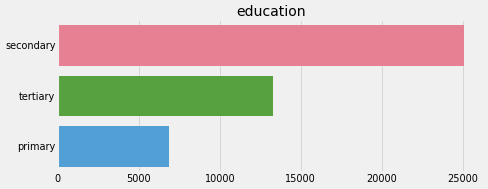

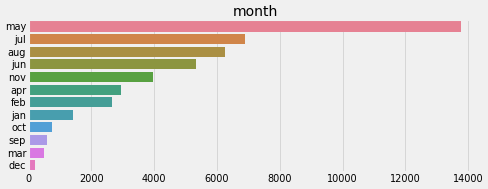

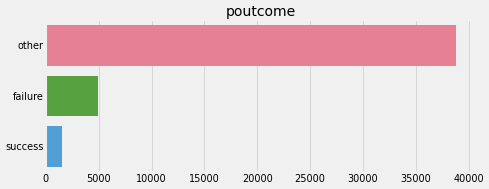

In [285]:
# Chart - 4 visualization code
#plotting barplots for all the categorical variables which are not binary type 
relevant_list1 = ['job',
 'marital',
 'education',
 'month',
 'poutcome']
for col in relevant_list1:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index, palette="husl")
    plt.title(col)
    plt.tight_layout()

##### **1. Why did you pick the specific chart?**




**BAR PLOT** 

All the features that we have taken in the above plots have more than two categories . So we chose column charts to know the number of outcomes in each categories .

##### **2. What is/are the insight(s) found from the chart?**

We can see that:
* The majority of targeted clients are employed in Blue Collar jobs followed by management and technician
* The majority of targeted clients  have only completed secondary education.
* Most of the potential clients are married.
* poutcome shows that 90% of the data belong to the category where the outcome of the last campaign is unknown

##### **3.Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Above plots can be useful in categorizing the clients in terms of their employment , education and marital status , which can be useful in making effective strategies to woo different groups.

### **Chart - 5 Bivariate Analysis - Continuous Variable(with the Target feature)**

In [286]:
#printing continuous list 
continuous_list

['age', 'balance', 'day', 'duration', 'campaign', 'previous']

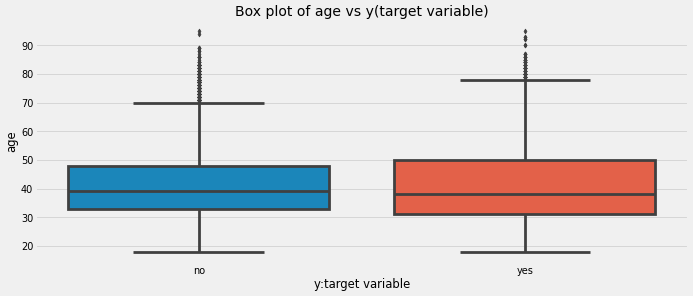

In [287]:
# creating box plot for checking the spread of age for the target variable(yes or no)
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')
plt.show()

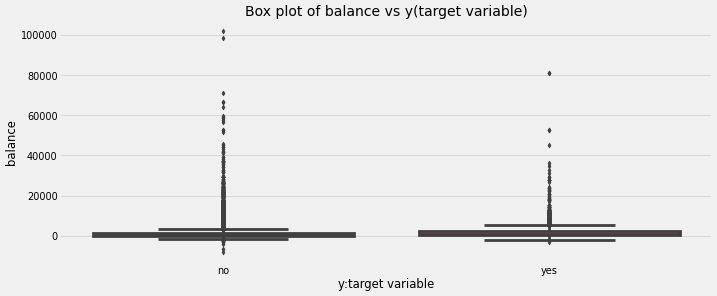

In [288]:
# creating box plot for checking the spread of balance across the target variable(yes or no)
sns.boxplot(y=df['balance'], x=df['y'])
plt.title('Box plot of balance vs y(target variable)')
plt.xlabel('y:target variable')
plt.show()

Text(0.5, 0, 'y:target variable')

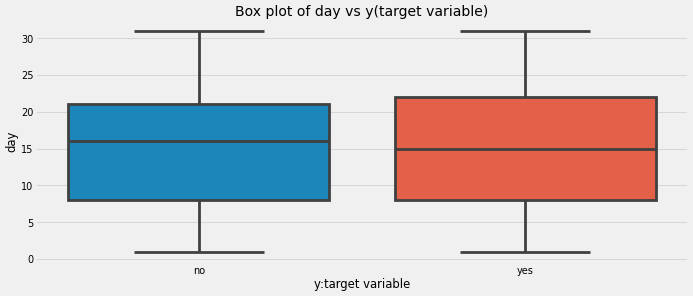

In [289]:
# creating box plot for checking the days of the month for the target variable(yes or no)
sns.boxplot(y=df['day'], x=df['y'])
plt.title('Box plot of day vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

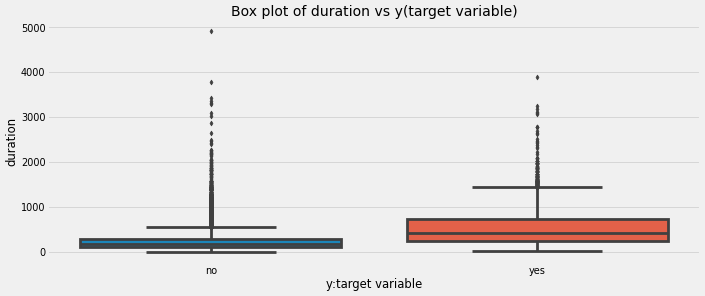

In [290]:
# creating box plot for checking the spread of duration in seconds for the target variable(yes or no)
sns.boxplot(y=df['duration'], x=df['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

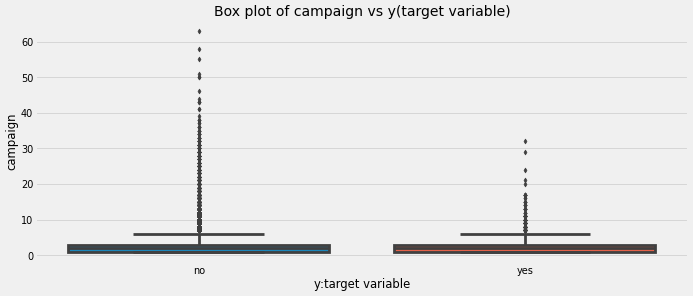

In [291]:
# creating box plot for checking the number of times the clients were contacted in this campaign for the target variable(yes or no)
sns.boxplot(y=df['campaign'], x=df['y'])
plt.title('Box plot of campaign vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 0, 'y:target variable')

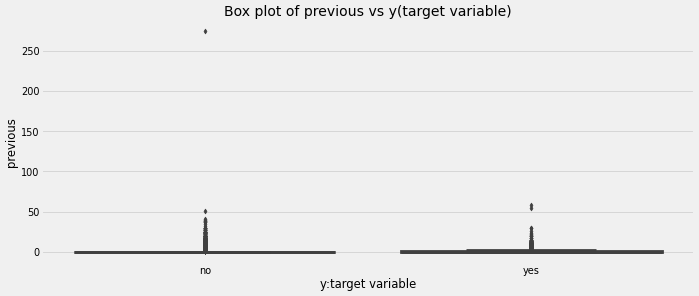

In [292]:
# creating box plot for checking the number of times the clients were contacted in previous campaign for the target variable(yes or no)
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

##### **1. Why did you pick the specific chart?**

**BOX PLOT**

To vizualize the spread of the continuous features across the target variable(yes or no), we used the box plots which clearly shows the median, quartiles and outliers accross the features.

##### **2. What is/are the insight(s) found from the chart?**


* Based on the bivariate analysis of continuous variable with target variable using box plot we came up with the following insights:
* The clints who are spending more time on the phone call has the more chances of conversion.
*Those who have contacted earlier has more chances to opt for term deposit.
*Balance campaign and previous are full of outliers which need to be treated.

### **Chart - 6 Bivariate Analysis of Categorical variables with the Target Feature**

In [293]:
# Chart - 6 visualization code
#defining a function to plot bar graphs of categorical variables with the target variable.
def plot_cat_data(df,dep_var):
  cat_columns = list(set(df.describe().columns)^set(df.columns))
  cat_columns.remove(dep_var)
  for i,e in enumerate(cat_columns):
    plt.figure(i)
    ax = sns.countplot(df[e],hue=df[dep_var], palette = "Set2")
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}'.format(height/df.shape[0]),
              ha="center")
    if(len(ax.patches)>10):
      plt.xticks(rotation=90)  
    plt.title(f'Term deposit in terms of {e}')
    plt.show()

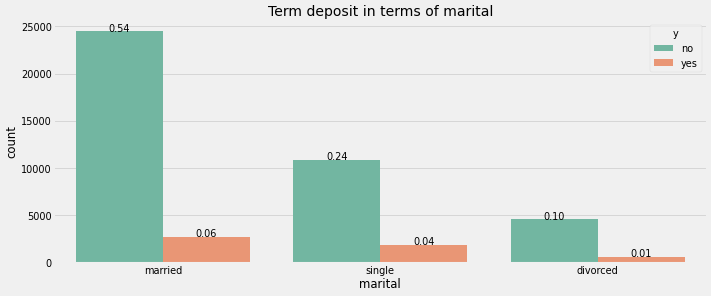

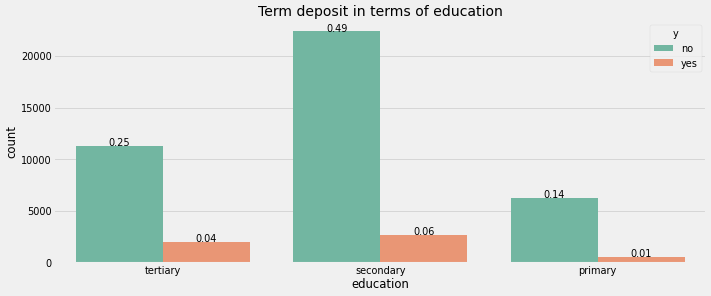

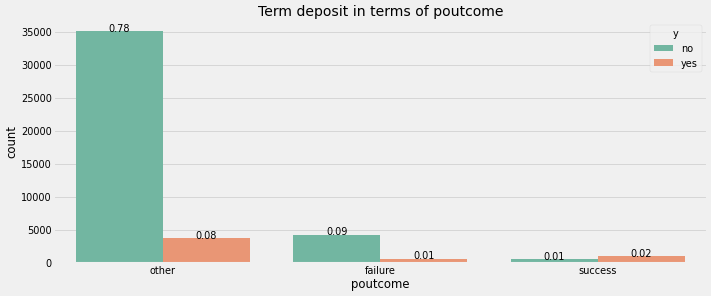

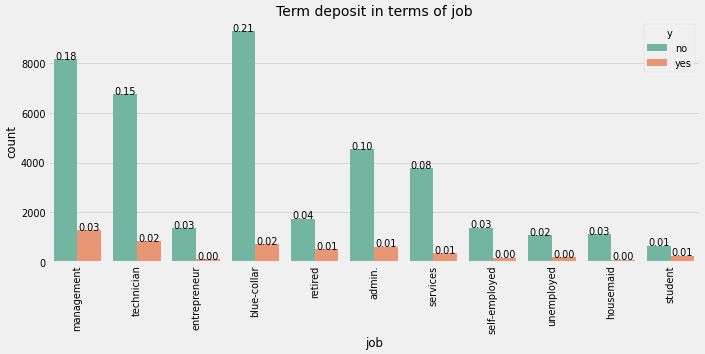

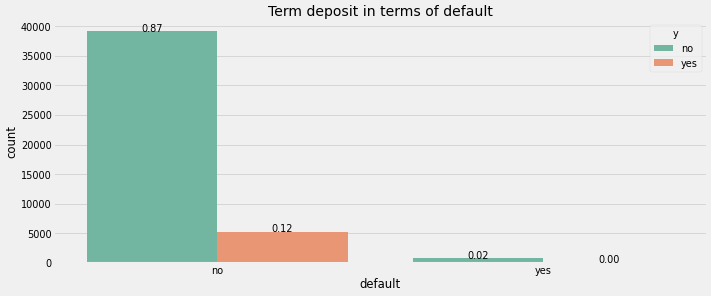

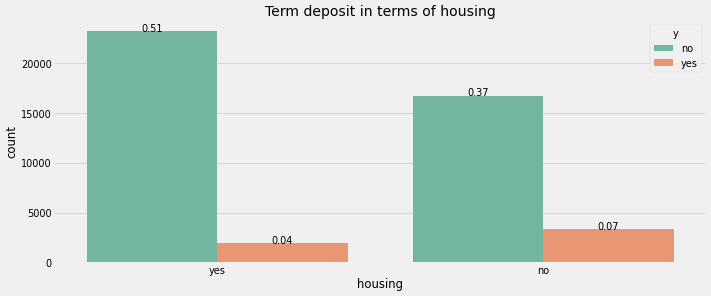

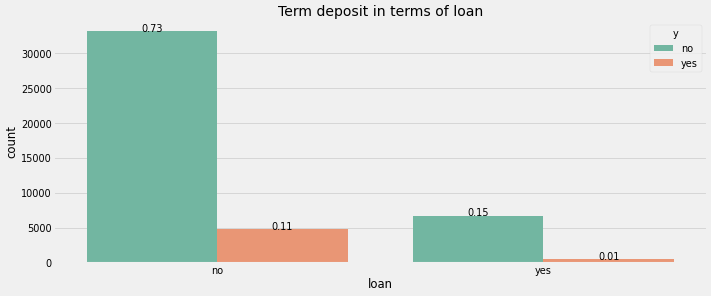

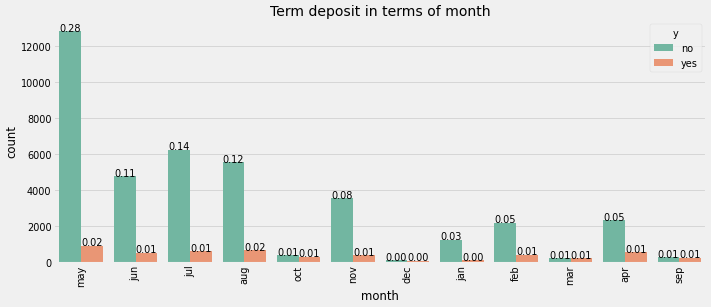

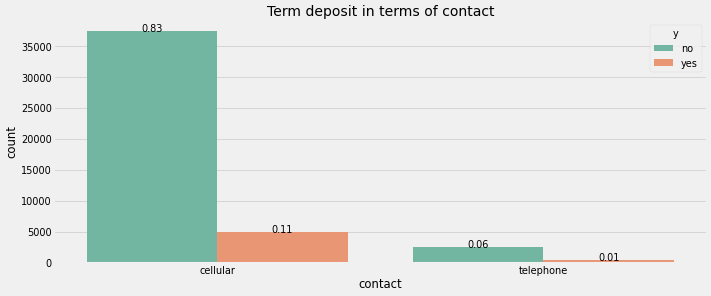

In [294]:
#using the defined function to plot bar graph
plot_cat_data(df,'y')

##### **1. Why did you pick the specific chart?**

**BAR CHART**  
We have used bar charts to count the values of clients who have opted for term deposit and those who have not opted for it. 
 

##### **2.What is/are the insight(s) found from the chart?**

Based on the above bar chart we came up with the following insights:

* It is clear that only those who have previously not defaulted on their credit have chosen to use term deposits, in contrast to those who defaulted on their credit.
* May is the month when most term deposits are made.
* We can observe that the majority of married and single clients chose term deposits, while just 0.01 of the customers who were divorced did.
* Oct, mar and sep has a good ratio of acceptance/rejection
* It cannot be clearly said that the y(term deposit) is dependent on the success or failure of the previous campaign as 0.08 agreed to the term deposit whose poutcome were unknown.
* Majority of the people who have not opted for any personal loan have made a term deposit.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

### **Chart - 7 - Understanding relationships between Variables**

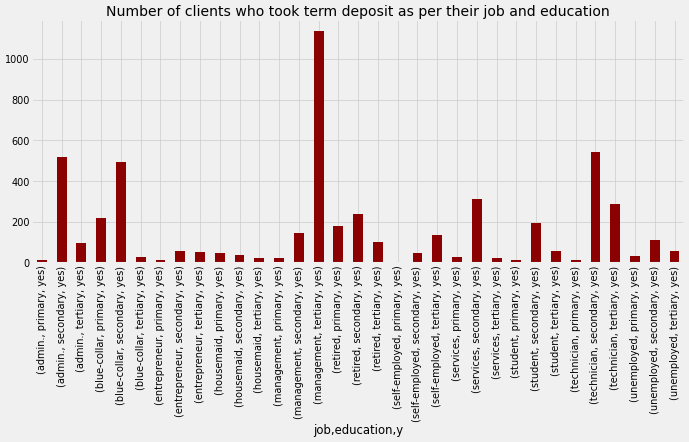

In [295]:
# Chart - 7 visualization code
#plotting a count plot to vizualize the number of customers according to their jobs and lvel of education by using group by operation
df_yes = df[df.y=='yes']
df_yes.groupby(['job','education','y'])['y'].count().plot(kind="bar",title = 'Number of clients who took term deposit as per their job and education', color="darkred")

##### **1. Why did you pick the specific chart?**

**BAR-COUNT PLOT**

Here, we used a Bar- Count Plot and visualised the number of clients who have made term deposits using a bar-count plot, grouping them based on their jobs and degree of education. We picked this particular graph since we were curious about the customer count.

##### **2. What is/are the insight(s) found from the chart?**

* We can see that the most of clients who have management-related jobs and a tertiary degree have made the most term deposits.
* Also, customers with the secondary level of education are the most with term deposits.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

* Because they are less prevalent, strategies can be developed to engage clients who are unemployed and have only completed their primary education.
* Additionally, Company can devise strategies to engage socially disadvantaged clients, including housemaids and technicians, who seldom have any money left over for term deposits. 

### **Chart - 8 - Understanding relationships between Variables**

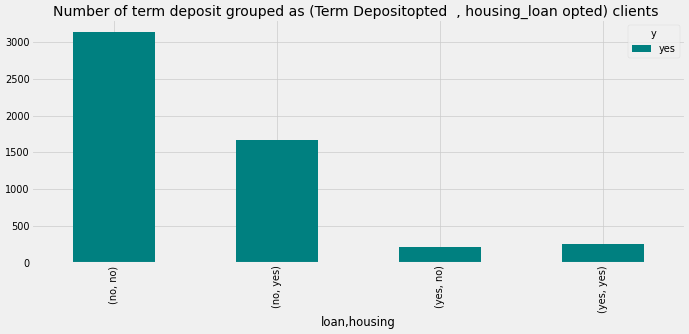

In [296]:
# Chart - 8 visualization code
#plotting bar graph to vizualize the count of clients who have opted for a term deposit given their housing loan.
df_yes.groupby(['loan','housing','y'])['y'].count().unstack().plot(kind='bar', color="teal")
plt.title("Number of term deposit grouped as (Term Depositopted  , housing_loan opted) clients ")
plt.show()

##### **1. Why did you pick the specific chart?**

We are using bar plots to check the number of occasions on which customer went for the term deposit given that he as taken housing loan /any other kind of loan or not.

##### **2. What is/are the insight(s) found from the chart?**

Based on the bar chart above we came up with following insights:
* If a customer is completely loan free he is more likely to go for term deposit.
* The customers who already have both kind of loan are less likely to go for term deposit.
* The customers who has only housing loan are second best options out of these conditions.

##### **3. Will the gained insights help creating a positive business impact?** 
**Are there any insights that lead to negative growth? Justify with specific reason.**

From the above insights potentential customers can be identified and based on that various strategies can be formed to acquire these customers. Clearly customers who does not have any kind of loan is the best customers to target.

### **Chart - 9 Understanding relationship between Variables**

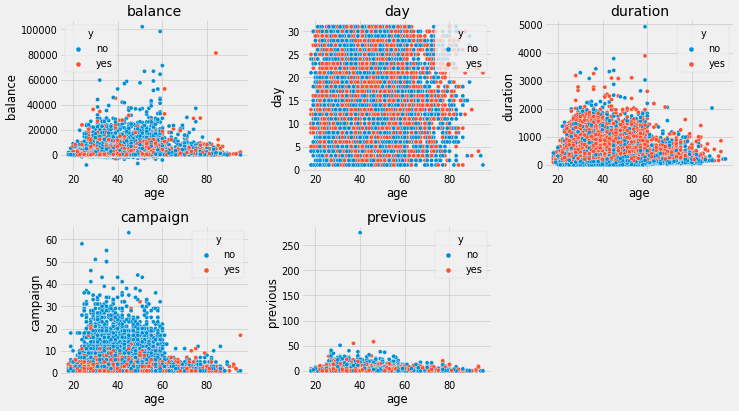

In [297]:
# Chart - 9 visualization code
abc = list(df[continuous_list].columns.values)
abc.remove('age')
n=1
fig = plt.figure(figsize=(15,12))
for i in abc:
    plt.subplot(3,3,n)
    n=n+1
    #fig = plt.figure(figsize=(8,8))
    sns.scatterplot(x=df.age, y=df[i], hue='y', data=df)
    plt.title(f'Age vs {i} with "yes" values')
    plt.title(i)
    plt.tight_layout()

##### **1. Why did you pick the specific chart?**

**SCATTER PLOT**

We used scatter plots to see the patterns of various continuous features with respect to age and we are identifying the conditions on which conversion of a customer depends.

##### **2. What is/are the insight(s) found from the chart?**

* The customers who spent less than 200 seconds on the phone call are not interested for the term deposit.
* Those who are earning less than 10,000 are mostly going for term deposit.
* We can see a very unusual pattern that when a customer who is contacted large number of times are not converting.

#### Chart - 10

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [298]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Chart - 10 - Correlation Heatmap**

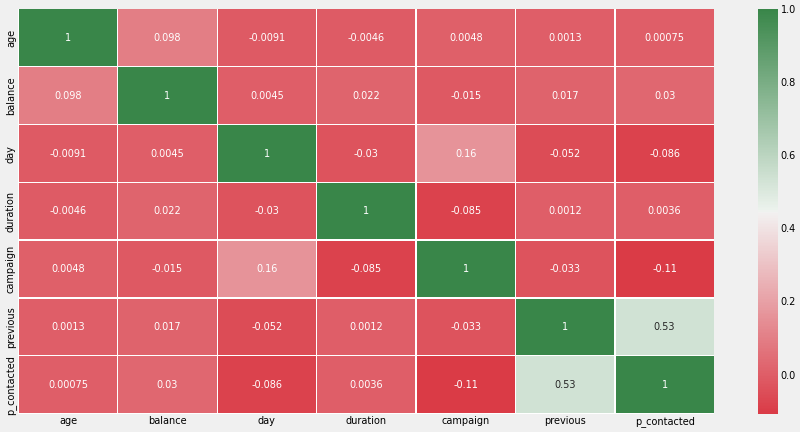

In [299]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)

##### **1. Why did you pick the specific chart?**


**HEATMAP**

This graph is used to check the correlation between all the variables. We have used it to gain insight about the presence of multicollinearity in our dataset. 

##### **2. What is/are the insight(s) found from the chart?**

It is clear that all other variables are not that correlated, with the exception of previous and p contacted, which have a 0.53 correlation i.i moderately correlated

###**Chart - 11  Pair Plot**

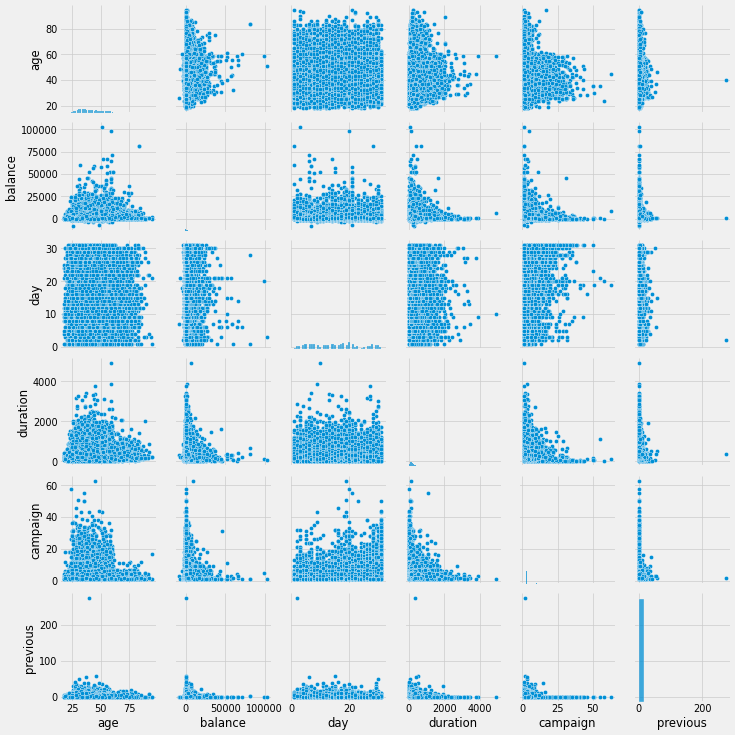

In [300]:
# Pair Plot visualization code
sns.pairplot(df[continuous_list], palette="husl")


##### **1. Why did you pick the specific chart?**

A pairs plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

In [301]:
# Hypothesis Test

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis(H0):** Customers with balances more than $10,000 take less than 500 seconds to get convinced to open a term deposit.

**Alternate Hypothesis(H1)**: Customers with balances less than $10,000 take more than 500 seconds to get convinced to open a term deposit.

Text(0.5, 1.0, 'previous')

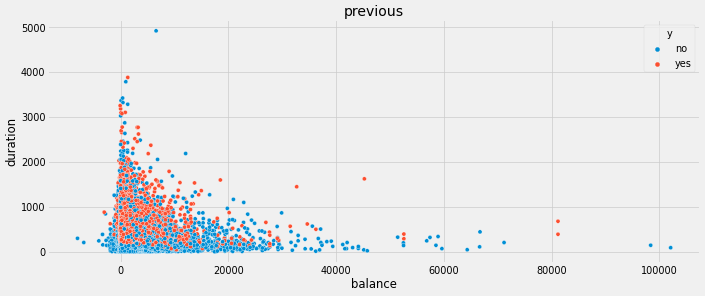

In [302]:
# Chart - 10 visualization code ------------------ hypothesis
sns.scatterplot(x=df.balance, y=df.duration, hue='y', data=df)
plt.title(f'Age vs {i} with "yes" values')
plt.title(i)

#### 2. Perform an appropriate statistical test.

In [303]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [304]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [305]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [306]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [307]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [308]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [309]:
# Expand Contraction

#### 2. Lower Casing

In [310]:
# Lower Casing

#### 3. Removing Punctuations

In [311]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [312]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [313]:
# Remove Stopwords

In [314]:
# Remove White spaces

#### 6. Rephrase Text

In [315]:
# Rephrase Text

#### 7. Tokenization

In [316]:
# Tokenization

#### 8. Text Normalization

In [317]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [318]:
# POS Taging

#### 10. Text Vectorization

In [319]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [320]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [321]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [322]:
# Transform Your data

### 6. Data Scaling

In [323]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [324]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [325]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [326]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [327]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [328]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [329]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [330]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [331]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [332]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [333]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [334]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [335]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [336]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***